# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

This dataset contains data related with 41188 direct marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [142]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [143]:
customer_campaign_df = pd.read_csv('/Users/gmelath/Desktop/Learnings/AI:ML/Berkley/Module-17/module_17_starter/data/bank-additional-full.csv', sep = ';')

In [144]:
customer_campaign_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [169]:
# Check for missing values
missing_values = customer_campaign_df.isnull().sum()

print("Missing Values per Feature:")
print(missing_values)

Missing Values per Feature:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [172]:
# Check data types
data_types = customer_campaign_df.dtypes
print("\nData Types per Feature:")
print(data_types)


Data Types per Feature:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [146]:
customer_campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 


Optimize the efficiency and effectiveness of outbound phone marketing campaigns for bank term deposits by identifying the most predictive customer segments and contact strategies to maximize conversion rates while minimizing marketing costs.

Key Points:

Efficiency: Reduce the number of calls required to convert a lead into a customer.

Effectiveness: Increase the overall conversion rate of phone marketing campaigns.

Customer Segmentation: Identify customer profiles most likely to subscribe to the term deposit.

Contact Strategy Optimization: Determine the optimal number and timing of calls for different customer segments.

Cost Reduction: Minimize marketing expenses by targeting the most promising leads and optimizing call resources.

By achieving these objectives, the bank can improve its return on investment (ROI) for phone marketing campaigns, enhance customer satisfaction, and strengthen its market position.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [147]:
# Identify target column
target_column = 'y'

In [148]:
# Identify categorical and numerical features
categorical_features = customer_campaign_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = customer_campaign_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("categorical_features : ", categorical_features)
print("numerical_features : ", numerical_features)

categorical_features :  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
numerical_features :  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [149]:
# Remove target from features
categorical_features.remove(target_column)

In [150]:
# Encoding categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [151]:
# Scaling numerical variables
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [152]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [153]:
# Encode target variable
label_encoder = LabelEncoder()
customer_campaign_df[target_column] = label_encoder.fit_transform(customer_campaign_df[target_column])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [154]:
# Split the dataset into features and target
X = customer_campaign_df.drop(target_column, axis=1)
y = customer_campaign_df[target_column]

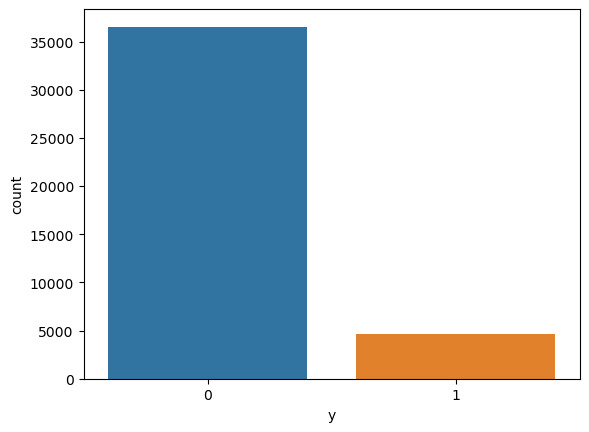

In [173]:
#Target Variable Distribution - check imbalance
sns.countplot(x='y', data=customer_campaign_df)
plt.show()

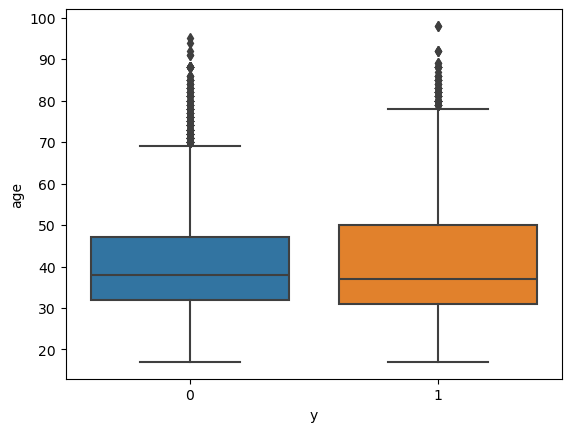

In [156]:
#Age vs target Variable
sns.boxplot(x='y', y='age', data=customer_campaign_df)
plt.show()

In [157]:
# Apply transformations
X = preprocessor.fit_transform(X)

In [158]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [160]:
# Calculate the most frequent class
most_frequent_class = y_train.value_counts().idxmax()
most_frequent_class

0

In [174]:
# Create baseline predictions
baseline_predictions = [most_frequent_class] * len(y_test)

In [176]:
# Calculate the accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline accuracy",baseline_accuracy)

Baseline accuracy 0.8865015780529255


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [163]:
# Build the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Problem 9: Score the Model

What is the accuracy of your model?

In [164]:
# Make predictions
y_pred = model.predict(X_test)

In [165]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9114


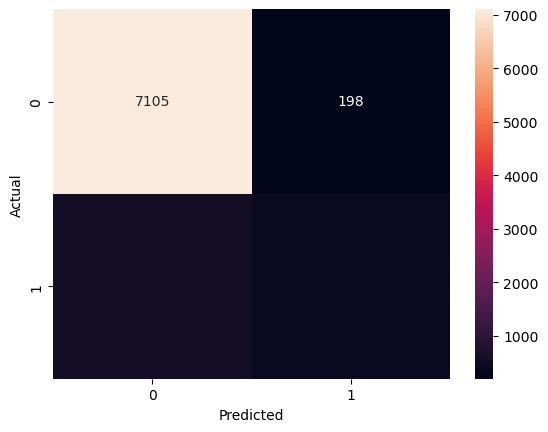

In [166]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [178]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

In [179]:
# Prepare DataFrame to store results
results = []

In [180]:
# Train and evaluate each model
for name, model in models.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Calculate accuracies
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    # Append results
    results.append({
        "Model": name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

In [183]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.834398        0.911806       0.911386
1                  KNN    0.001326        0.927830       0.900704
2        Decision Tree    0.165621        1.000000       0.886866
3                  SVM   10.449540        0.922701       0.911993


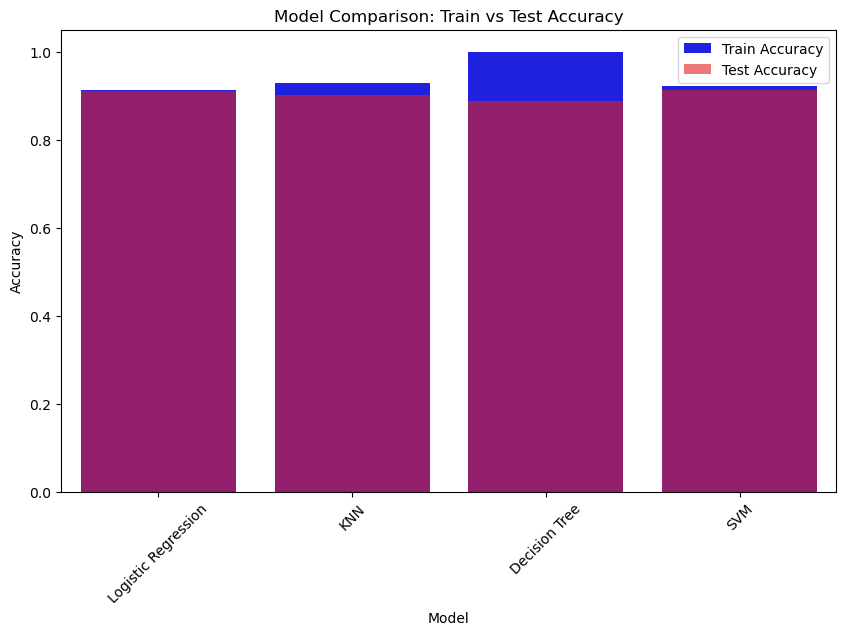

In [185]:
# Bar Plot for Train and Test Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Train Accuracy', data=results_df, color='blue', label='Train Accuracy')
sns.barplot(x='Model', y='Test Accuracy', data=results_df, color='red', alpha=0.6, label='Test Accuracy')
plt.title('Model Comparison: Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [137]:
#Apply PCA for Dimensionality Reduction

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Accuracy after PCA: 0.8916
Explained variance by each component: [0.62872927 0.32872284]
Total number of components: 2


In [ ]:
# Train a Model on the Reduced Dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

In [139]:
# Evaluate the Model
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after PCA: {accuracy:.4f}')

#Examine the explained variance ratio
print(f'Explained variance by each component: {pca.explained_variance_ratio_}')
print(f'Total number of components: {pca.n_components_}')

Accuracy after PCA: 0.8916
Explained variance by each component: [0.62872927 0.32872284]
Total number of components: 2


In [111]:
#Hyperparameter Tuning and Grid Search for KNN
# Define parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Set up GridSearchCV
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best KNN Parameters:", knn_grid_search.best_params_)
print("Best KNN Score:", knn_grid_search.best_score_)

Best KNN Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best KNN Score: 0.903854324734446


In [112]:
#Hyperparameter Tuning and Grid Search for Decision tree
# Define parameter grid
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Set up GridSearchCV
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best Decision Tree Score:", dt_grid_search.best_score_)

Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Decision Tree Score: 0.907496206373293


In [113]:
#Performance Metric
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1')
dt_grid_search.fit(X_train, y_train)

# Best parameters and score using F1
print("Best Decision Tree Parameters (F1):", dt_grid_search.best_params_)
print("Best Decision Tree F1 Score:", dt_grid_search.best_score_)

Best Decision Tree Parameters (F1): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Decision Tree F1 Score: 0.5622683741136987


##### Questions